## Bank Customer Churn Prediction

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Reading the data set

In [2]:
df = pd.read_csv(r'churn.csv')

In [3]:
#top 5 data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#bottom 5 data
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


# Understanding the data

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


There is 10000 rows and 14 columns and each column is having no missing value i.e no null value present

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
# we have to check the unique value correspondig to the data 
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
# checking for null value
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [10]:
df.isna().any().sum()

0

#There is no null value present

## Duplicate Check

In [11]:
df[df.duplicated()].sum()

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

# Statistical information of the data

In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# Categorical columns
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


In [14]:
# now we have basic understanding of the data now we will go for the data preprocessing

# Data Preprocessing

In [15]:
df.head(2)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [16]:
#droping the irrelevant attribute from the data
drop_col = ['RowNumber', 'Surname', 'CustomerId']

In [17]:
df.drop(columns=drop_col, axis=1, inplace=True)

In [18]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [19]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
#converting all the object type to the category type
cat = ['Geography', 'Gender']

In [21]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [22]:
# correlation checking
df.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


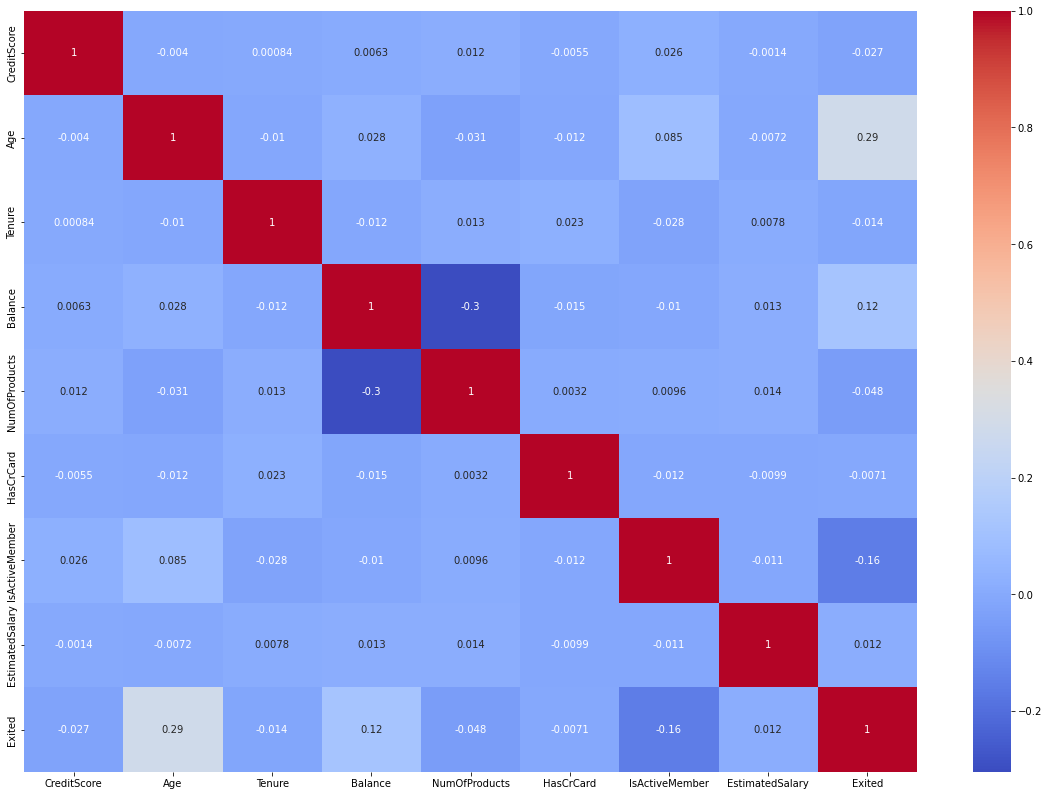

In [23]:
#plotting heat map
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(), cmap='coolwarm', cbar=True, xticklabels=True, annot=True)
plt.show()

In [24]:
# in above heat map no two column showing correlation > 0.75 which is good to go futher data preprocessing

In [25]:
conditions = [
 (df['EstimatedSalary'] <= 25000),
 (df['EstimatedSalary'] > 25000) & (df['EstimatedSalary'] <= 50000),
 (df['EstimatedSalary'] > 50000) & (df['EstimatedSalary'] <= 75000),
 (df['EstimatedSalary'] > 75000) & (df['EstimatedSalary'] <= 100000),
 (df['EstimatedSalary'] > 100000) & (df['EstimatedSalary'] <= 125000),
 (df['EstimatedSalary'] > 125000) & (df['EstimatedSalary'] <= 150000),
 (df['EstimatedSalary'] > 150000) & (df['EstimatedSalary'] <= 1750000),
 (df['EstimatedSalary'] > 175000) & (df['EstimatedSalary'] <= 200000)
]
values = ['Less than 25000', '25,000-50,000','50,000-75,000','75,000-1,00,000',
          '1,00,000-1,25,000','1,25,000-1,50,000','1,50,000-1,75,000','1,75,000-2,00,000']

In [26]:
df['SalaryRange'] = np.select(conditions, values)

In [27]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"1,00,000-1,25,000"
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"1,00,000-1,25,000"
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,"1,00,000-1,25,000"


In [28]:
# creating one column according to the age group
conditions = [
    (df['Age']>=0) & (df['Age']<18), 
    (df['Age']>=18) & (df['Age']<30),
    (df['Age']>=30) & (df['Age']<40),
    (df['Age']>=40) & (df['Age']<50),
    (df['Age']>=50) & (df['Age']<60),
    (df['Age']>=60)]
values = ['Minor',
         '18-30',
         '30-40',
         '40-50',
         '50-60',
         '>60'
        ]
df['AgeGroup'] = np.select(conditions, values)


In [29]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"1,00,000-1,25,000",40-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"1,00,000-1,25,000",40-50


In [30]:
df['AgeGroup'].value_counts()

30-40    4346
40-50    2618
18-30    1641
50-60     869
>60       526
Name: AgeGroup, dtype: int64

In [31]:
df.SalaryRange.value_counts()

1,50,000-1,75,000    2455
1,25,000-1,50,000    1279
1,00,000-1,25,000    1276
50,000-75,000        1269
75,000-1,00,000      1268
25,000-50,000        1236
Less than 25000      1217
Name: SalaryRange, dtype: int64

## Univariate Analysis

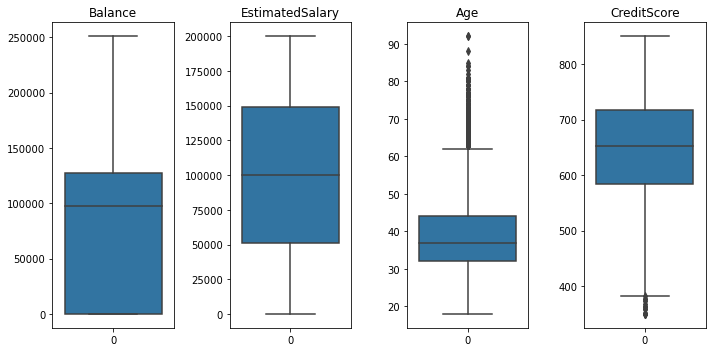

In [32]:
columns = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']
col, ax = plt.subplots(ncols = len(columns),figsize=(10,5))
for column,axis in zip(columns,ax):
    sns.boxplot(data=df[column],ax=axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

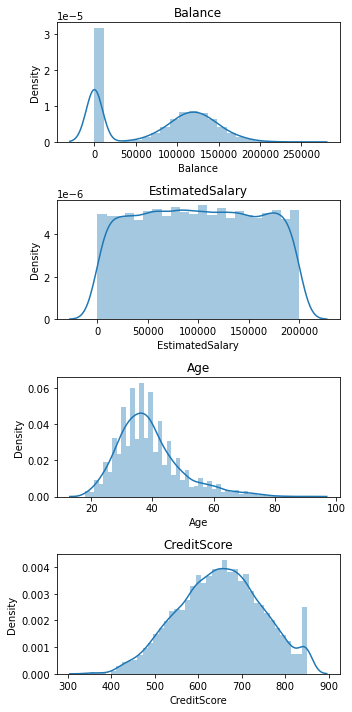

In [33]:
columns = ['Balance', 'EstimatedSalary', 'Age', 'CreditScore']
col, ax = plt.subplots(nrows = len(columns),figsize=(5,10))
for column,axis in zip(columns,ax):
    sns.distplot(df[column],ax=axis)
    axis.set_title(column)
plt.tight_layout()
plt.show()

## From the above observation we get to know that Age is Right Skewed

 so to remove this skewness we go for the log normal

In [34]:
df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,AgeGroup
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,"1,00,000-1,25,000",40-50
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,"1,00,000-1,25,000",40-50


In [35]:
df['Age'].skew()

1.0113202630234552

In [36]:
df.Balance.skew()

-0.14110871094154384

In [37]:
df.EstimatedSalary.skew()

0.0020853576615585162

In [38]:
df.CreditScore.skew()

-0.07160660820092675

In [39]:
age1 = np.log(df['Age'])

In [40]:
age1.head(2)

0    3.737670
1    3.713572
Name: Age, dtype: float64

In [41]:
if 'LogAge' not in df.columns:
    df.insert(loc=4, column='LogAge', value=age1)

In [42]:
df.head(2)

,CreditScore,Geography,Gender,Age,LogAge,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,SalaryRange,AgeGroup
0,619,France,Female,42,3.737670,2,0.00,1,1,1,101348.88,1,"1,00,000-1,25,000",40-50
1,608,Spain,Female,41,3.713572,1,83807.86,1,0,1,112542.58,0,"1,00,000-1,25,000",40-50


## Bivariate Analysis

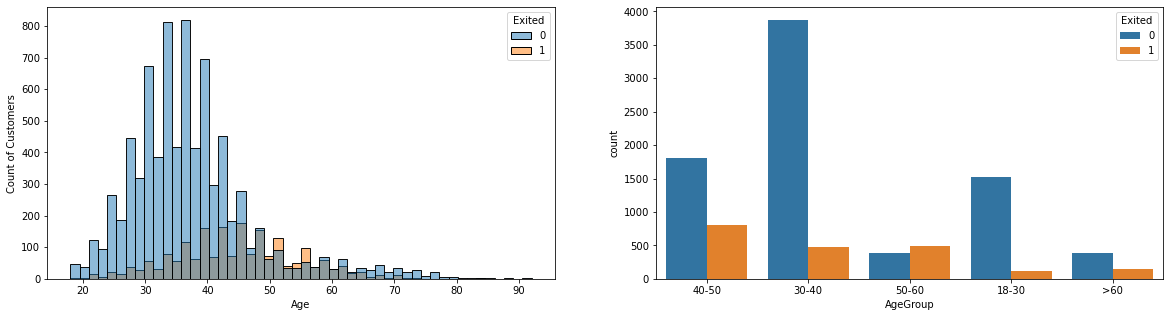

In [43]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_xlabel("Age")
ax[0].set_ylabel('Count of Customers')
sns.histplot(x=df['Age'], bins=50, hue=df['Exited'],ax=ax[0])
plt.ylabel('Count of Customers')
sns.countplot(x=df['AgeGroup'], hue=df['Exited'], ax=ax[1])
plt.show()

## From the above analysis we can see that the age group 40-50 churn in high

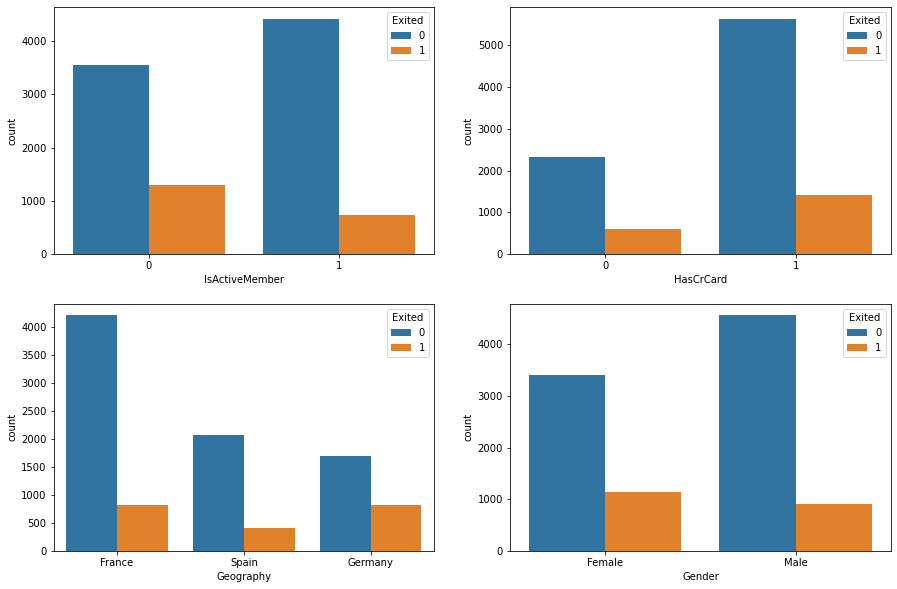

In [44]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(data=df,x=df['IsActiveMember'], hue='Exited', ax=ax[0][0])
sns.countplot(data=df, x=df['HasCrCard'], hue='Exited', ax=ax[0][1])
sns.countplot(data=df,x=df['Geography'], hue='Exited', ax=ax[1][0])
sns.countplot(data=df, x=df['Gender'], hue='Exited', ax=ax[1][1])
plt.show()

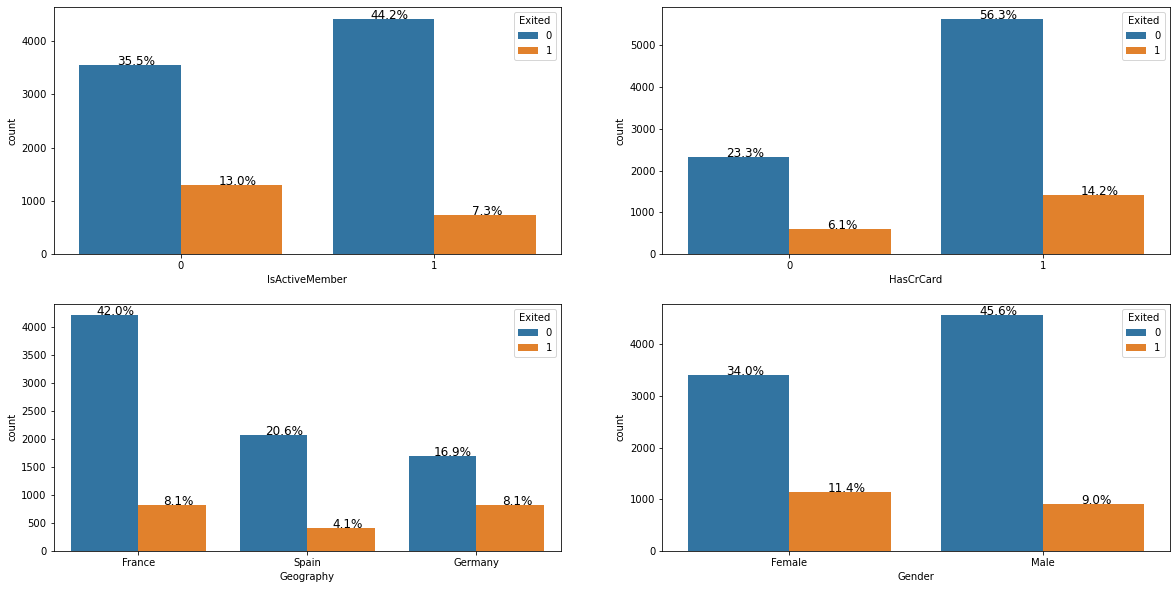

In [45]:
fig, axis = plt.subplots(2,2,figsize=(20,10))
ax = sns.countplot(data=df,x=df['IsActiveMember'], hue='Exited', ax=axis[0][0])
total = len(df['IsActiveMember'])
for p in ax.patches:
    percentage = "{:0.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size=12)
ax = sns.countplot(data=df, x=df['HasCrCard'], hue='Exited', ax=axis[0][1])
total = len(df['HasCrCard'])
for p in ax.patches:
    percentage = "{:0.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size=12)
ax = sns.countplot(data=df,x=df['Geography'], hue='Exited', ax=axis[1][0])
total = len(df['Geography'])
for p in ax.patches:
    percentage = "{:0.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size=12)
ax = sns.countplot(data=df, x=df['Gender'], hue='Exited', ax=axis[1][1])
total = len(df['Gender'])
for p in ax.patches:
    percentage = "{:0.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage,(x,y), size=12)
plt.show()


## Insights
1. Inactive member having almost double churn than the Active member
2. The person having credit card having the churn double than the person not having credit card
3. person from frace and Germany is having the same churn and double churn as compared to spain
    as almost half of the people is from france but there is less from germarny but the churn rate is same.
4. Female churn is high as compared to the male

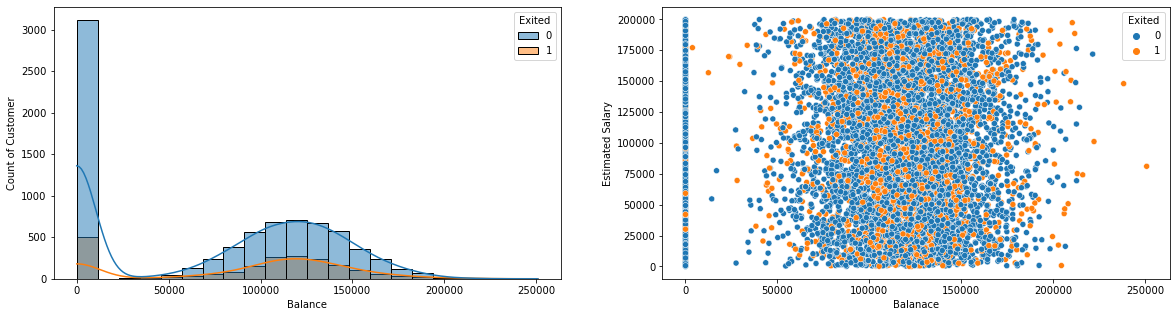

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
ax[0].set_xlabel("Balance")
ax[0].set_ylabel("Count of Customer")
sns.histplot(data=df, x='Balance', hue='Exited', ax=ax[0], kde=True)

ax[1].set_ylabel("Estimated Salary")
ax[1].set_xlabel("Balanace")
sns.scatterplot(data=df, x='Balance', y='EstimatedSalary', hue='Exited')
plt.show()

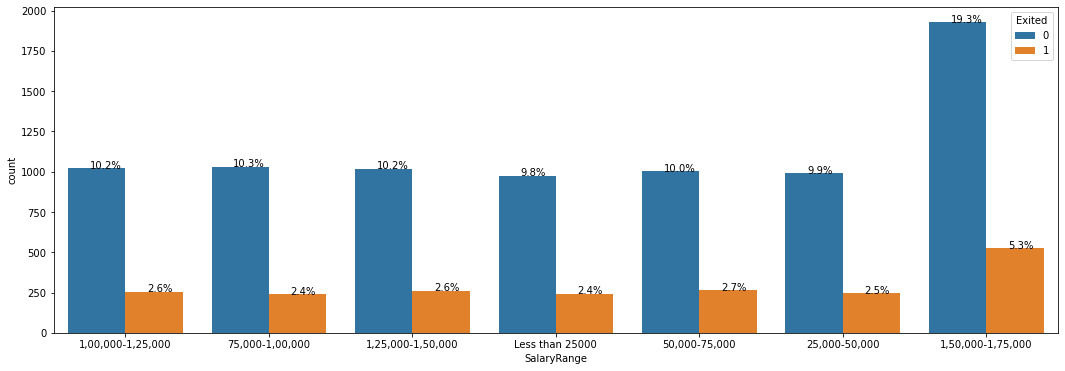

In [47]:
fig, axes = plt.subplots(1,1,figsize=(18,6))
ax = sns.countplot(data=df, x='SalaryRange', hue='Exited')
total = len(df.SalaryRange)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_y() + p.get_height()
    axes.annotate(percentage,(x,y))
plt.show()

## Insights
Valuable customer i.e Salary Range above 1,50,000 to 1,75,000 churn rate is high .. 

banks needs to provide some offer and may give high rate of interest

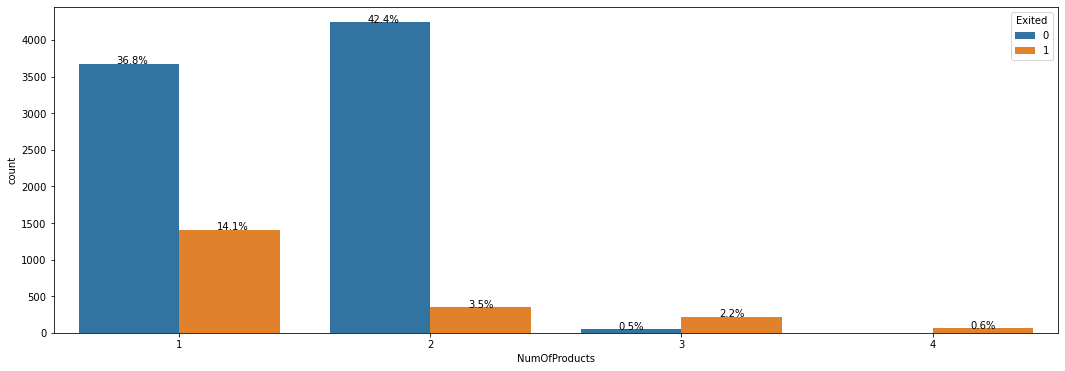

In [48]:
fig, axes = plt.subplots(1,1,figsize=(18,6))
ax = sns.countplot(data=df, x='NumOfProducts', hue='Exited')
total = len(df.SalaryRange)
for p in ax.patches:
    percentage = "{:.1f}%".format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width()/2-0.05
    y = p.get_y() + p.get_height()
    axes.annotate(percentage,(x,y))
plt.show()

## Insights
Customer having 1 number of products churn rate is high 

Banks must provide some valuable offer and number of product to the customer

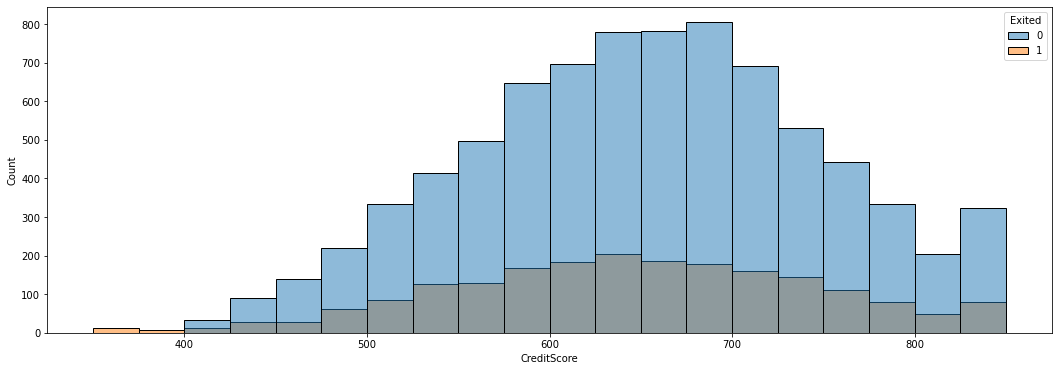

In [49]:
plt.figure(figsize=(18,6))
sns.histplot(data=df,x='CreditScore',bins=20,hue='Exited')
plt.show()


In [50]:
# drop the column which was used for eda like SalaryRange Age and AgeGroup
col = ['SalaryRange','Age', 'AgeGroup']
df.drop(columns=col, inplace=True)

In [51]:
df.head(2)

,CreditScore,Geography,Gender,LogAge,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,3.737670,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,3.713572,1,83807.86,1,0,1,112542.58,0


In [52]:
# how many percentage of person exited from the bank and how many are retained?
total = len(df['Exited'])

s = np.round(df['Exited'].value_counts()*100/total,2)
print("Exited", s[1])
print("Retained", s[0])

Exited 20.37
Retained 79.63


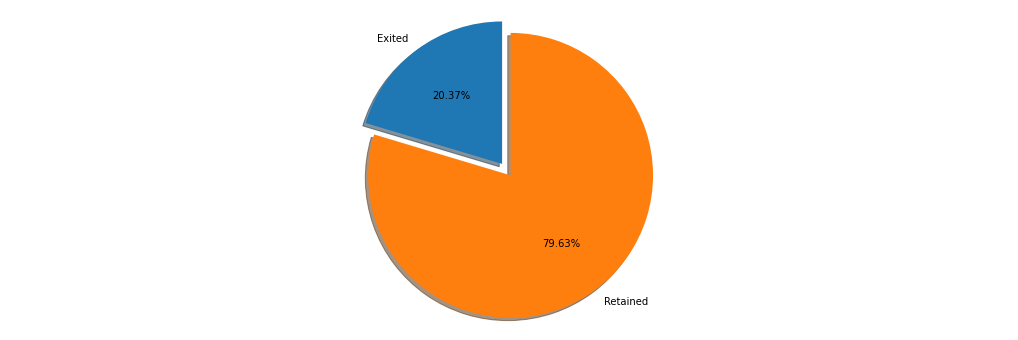

In [53]:
fig, ax = plt.subplots(figsize=(18,6))
size = [ df.Exited[df['Exited']==1].count(), df.Exited[df.Exited==0].count() ]
explode = (0,0.1)
ax.pie(size, explode=explode , labels=['Exited', 'Retained'], autopct='%.2f%%', shadow=True,startangle=90)
ax.axis('equal')
plt.show()

In [54]:
unique, count = np.unique(df['Exited'], return_counts=True)

{k:v for k,v in zip(unique, count)}

{0: 7963, 1: 2037}

## The data is imbalanced so to balance this data we go for the SMOTE synthetic minority over sampling technique

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [57]:
# divide the data into dependent and independent variable
df.head(2)
X = df.drop(columns=['Exited'])
y = df.Exited

In [58]:
X.shape

(10000, 10)

In [59]:
y.shape

(10000,)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [61]:
X_train.shape

(8000, 10)

In [62]:
X_test.shape

(2000, 10)

In [63]:
y_train.shape

(8000,)

In [64]:
y_test.shape

(2000,)

In [65]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
LogAge             float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [72]:
categorical_feature = ['Geography', 'Gender']
numerical_feature = ['CreditScore',
                     'LogAge',
                     'Tenure', 
                     'Balance',
                     'NumOfProducts',
                     'HasCrCard',
                     'IsActiveMember',
                     'EstimatedSalary'
                    ]

In [73]:
# Encoding and Scaling
preprocessor = ColumnTransformer(
                    transformers=[
                      ('num', StandardScaler(), numerical_feature),
                        ('cat', OneHotEncoder(), categorical_feature)
                    ]
)

In [74]:
smt = SMOTE(random_state=52)

In [75]:
# logistic Regressior
regressor = LogisticRegression()

In [76]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smote', smt),
    ('regressor', regressor)
])

In [77]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['CreditScore', 'LogAge',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts', 'HasCrCard',
                                                   'IsActiveMember',
                                                   'EstimatedSalary']),
                                                 ('cat', OneHotEncoder(),
                                                  ['Geography', 'Gender'])])),
                ('smote', SMOTE(random_state=52)),
                ('regressor', LogisticRegression())])

In [78]:
y_pred = pipe.predict(X_test)

In [79]:
y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [87]:
y_test

8002    0
5438    0
2369    1
8370    0
7443    0
       ..
4691    0
7168    0
9962    1
9888    0
4892    1
Name: Exited, Length: 2000, dtype: int64

In [88]:
from sklearn.metrics import classification_report
classifier = classification_report(y_test, y_pred)

In [90]:
print(classifier)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1579
           1       0.38      0.67      0.49       421

    accuracy                           0.70      2000
   macro avg       0.64      0.69      0.64      2000
weighted avg       0.78      0.70      0.73      2000



In [96]:
from sklearn.metrics import  accuracy_score, precision_score, mean_squared_error as mse, recall_score, f1_score

In [98]:
print("Training Score : ", pipe.score(X_train, y_train))
print("Testing Score : ", pipe.score(X_test, y_test))

print("MSE Error : ",mse(y_test, y_pred))
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print("Precission Score : ", precision_score(y_test, y_pred))
print("Recall Score : ", recall_score(y_test, y_pred))
print("F1 Score : ", f1_score(y_test, y_pred))

Training Score :  0.713125
Testing Score :  0.701
MSE Error :  0.299
Accuracy Score :  0.701
Precission Score :  0.3805668016194332
Recall Score :  0.669833729216152
F1 Score :  0.4853700516351119


In [99]:
from sklearn.metrics import confusion_matrix

In [102]:
print("Confusion Matrix \n " ,confusion_matrix(y_test, y_pred))

Confusion Matrix 
  [[1120  459]
 [ 139  282]]
